In [1]:
import cv2
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [46]:
model = tf.keras.models.load_model('25_03_2024.h5')

In [48]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
while True:
    ret, frame = cap.read()
    print(frame.shape)
    #frame = frame[50:500, 50:500, :]
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))
    yhat = model.predict(np.expand_dims(resized/255, 0))
    sample_coords = yhat[1][0]
    print(yhat[0])
    if yhat[0] > 0.9:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [
                           1080,1080]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [
                           1552, 1552]).astype(int)),
                      (255, 0, 0), 2)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


(1552, 1552, 3)
1/1 [==============================] - 0s 61ms/step
[[0.02049999]]
(1552, 1552, 3)
1/1 [==============================] - 0s 55ms/step
[[0.9946543]]
(1552, 1552, 3)
1/1 [==============================] - 0s 58ms/step
[[0.99489284]]
(1552, 1552, 3)
1/1 [==============================] - 0s 67ms/step
[[0.9948849]]
(1552, 1552, 3)
1/1 [==============================] - 0s 51ms/step
[[0.99403393]]
(1552, 1552, 3)
1/1 [==============================] - 0s 56ms/step
[[0.9931551]]
(1552, 1552, 3)
1/1 [==============================] - 0s 54ms/step
[[0.9919845]]
(1552, 1552, 3)
1/1 [==============================] - 0s 48ms/step
[[0.9929241]]
(1552, 1552, 3)
1/1 [==============================] - 0s 47ms/step
[[0.9944309]]
(1552, 1552, 3)
1/1 [==============================] - 0s 47ms/step
[[0.99215096]]
(1552, 1552, 3)
1/1 [==============================] - 0s 47ms/step
[[0.99195105]]
(1552, 1552, 3)
1/1 [==============================] - 0s 47ms/step
[[0.991902]]
(1552, 1552,

In [27]:
img = cv2.imread('a_11.jpg')[:1080,:1440]
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (120, 120))
img1 = img1.reshape(1,120,120,3)
y = model.predict(img1/255)
print(y)

1/1 [==============================] - 0s 43ms/step
[array([[0.999945]], dtype=float32), array([[0.29666895, 0.26874194, 0.71237636, 0.7036657 ]], dtype=float32)]


In [28]:
import matplotlib.pyplot as plt

(1080, 1440, 3)


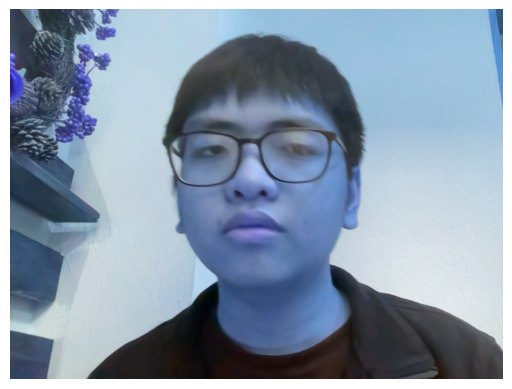

In [29]:
plt.axis('off')
print(img.shape)
plt.imshow(img)

In [30]:
print(y[1][0])
print(y[1][0][:2])

[0.29666895 0.26874194 0.71237636 0.7036657 ]
[0.29666895 0.26874194]


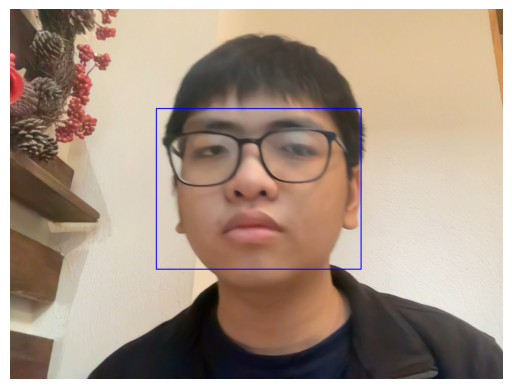

In [31]:
img = cv2.rectangle(img, (int(y[1][0][0]*1440),int(y[1][0][1]*1080)), (int(y[1][0][2]*1440),int(y[1][0][3]*1080)), (255, 0, 0), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('ga`.jpg', img)
plt.axis('off')
plt.imshow(img)